### Pandas

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt

from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 有时候，字体更改后，会导致坐标轴中的部分字符无法正常显示，此时需要更改axes.unicode_minus参数
mpl.rcParams["axes.unicode_minus"] = False

#### 1、Series
- Series是一种类似于一维数组对象，由下列两部分组成：
    - values：一维数组（ndarray类型）
    - index：相关的数据索引标签

#### 1）Series创建
- 两种创建方式
    - 由列表或numpy数组创建：默认索引是0至N-1整数

In [3]:
# 使用列表创建Series
Series(data=[1,2,3])    # 未写index参数，隐式索引
Series(data=[1,2,3],index=['a','b','c'])     # 显式索引

a    1
b    2
c    3
dtype: int64

In [27]:
# 使用numpy创建Series
s1 = Series(data=np.random.randint(0,20,size=(4,)))
s1

0    12
1    19
2    15
3     7
dtype: int32

================================

练习：使用多种方式创建下列Series
- 语文 150
- 数学 150
- 英语 150
- 理综 300

================================

In [28]:
Series(data=[150,150,150,300],index=['语文','数学','英语','理综'])
s2 = Series(data=np.array([150,150,150,300]),index=['语文','数学','英语','理综'])
s2

语文    150
数学    150
英语    150
理综    300
dtype: int32

#### 2）Series的索引和切片
- 可以使用中括号取单个索引（返回元素类型），或者中括号里一个列表取多个索引（返回Sereis类型）

- 1.显式索引：
    - 使用index中的元素作为索引值，可以不写
    - 使用s.loc[]：注意，[]中为显示索引值

In [30]:
s1[0]
s2[2]   # 显示索引存在，隐式索引还可以用
s2['英语']
s2[[1,2]]

数学    150
英语    150
dtype: int32

- 2.隐式索引：
    - 使用index中的元素作为索引值
    - 使用s.iloc[]：注意，[]中为隐式索引值

- 3.切片

In [34]:
s2[0:2]

语文    150
数学    150
dtype: int32

- 4.Sereis基本概念
    - 可以通过shape，size，index，values等得到Sereis属性

In [9]:
s2.values    # array([150, 150, 150, 300])
s2.index     # Index(['语文', '数学', '英语', '理综'], dtype='object')

Index(['语文', '数学', '英语', '理综'], dtype='object')

- s.head(n)：查看前n个值
- s.tail(n)：查看后n个值

In [44]:
s2.head(2)
s2.tail(3)

数学    150
英语    150
理综    300
dtype: int32

- 对Series进行去重：s.unique()

In [4]:
s3 = Series([1,1,2,2,3,4,5,5])
s3.unique()     # array([1, 2, 3, 4, 5], dtype=int64)

array([1, 2, 3, 4, 5], dtype=int64)

- 当索引没有对应的值时，可能出现缺失数据显示NaN情况

In [48]:
s1 = Series([1,2,3],index=['a','b','c'])
s2 = Series([1,2,3],index=['a','b','d'])
s = s1 + s2
s

a    2.0
b    4.0
c    NaN
d    NaN
dtype: float64

- 使用pd.isnull(obj)，pd.notnull(obj)或s.isnull(),s.notnull()检测数据缺失

In [142]:
s.isnull()
s.notnull()

a     True
b     True
c    False
d    False
dtype: bool

In [58]:
s[[True,True,False,False]]   # 只会提取True对应值
# 空值过滤
s[s.notnull()]

a    2.0
b    4.0
dtype: float64

#### 3）Series运算
- 在运算中自动对齐不同索引值数据，若索引不对呀，则为NaN

#### 2、DataFrame
- DataFrame是一个表格型的数据结构。DataFrame由按一定顺序排列的多列数据组成。将Series的使用场景从一维拓展到多维。DataFrame既有行索引，也有列索引。
- 行索引：index
- 列索引：columns
- 值：values

- 1）DataFrame创建：最常用的方式是传递一个字典来创建。DataFrame以字典的键作为每一列的名称，以字典的值（一个数组）作为每一列。此外，DataFrame会自动加上每一行索引。使用字典创建的DataFrame后，则columns参数将不能使用。同Sereis一样，若传入的列与字典的键不匹配，则相应值为NaN。

- 使用ndarray创建DataFrame

In [65]:
DataFrame(np.random.randint(0,20,(3,4)),index=['a','b','c'])

,0,1,2,3
a,18,13,10,2
b,9,12,17,5
c,2,16,2,19


- 使用字典创建DataFrame

In [14]:
dic = {
    '张三':[11,22,33,44],
    '李四':[55,66,77,88]
}
df = DataFrame(dic,index=['语文','数学','英语','文综'])
df

,张三,李四
语文,11,55
数学,22,66
英语,33,77
文综,44,88


- DataFrame属性：values，columns，index，shape

In [80]:
df.columns

Index(['张三', '李四'], dtype='object')

- 2）DataFrame索引
- 1. 对列进行索引
    - 通过类似字典方式：df['张三']
    - 通过属性方式：df.张三
- 可以将DataFrame的列获取为一个Series，返回的Series拥有源DataFrame相同的索引，且name属性也已经设置好了，就是相应的列名。

In [20]:
df['张三']
df.张三
# 获取前2列
df[["张三","李四"]]

,张三,李四
语文,11,55
数学,22,66
英语,33,77
文综,44,88


- 3）对行进行索引
    - 使用df.loc[index]
    - 使用df.iloc[整数]

In [30]:
df.loc["语文"]      # 类型：pandas.core.series.Series
df.loc[['语文']]    # 类型：pandas.core.frame.DataFrame
df.iloc[0]          # 类型：pandas.core.series.Series
df.iloc[[0,1]]      # 类型：pandas.core.frame.DataFrame

,张三,李四
语文,11,55
数学,22,66


- 4）对元素进行索引
    - 使用列索引
    - 使用行索引：df.loc['语文'，'张三']，df.iloc[0，1]。行在前，列在后

In [34]:
df.loc['语文','张三']
df.iloc[0,1]
df.loc[["语文","英语"],"张三"]

语文    11
英语    33
Name: 张三, dtype: int64

- 5）切片：直接使用中括号
    - 索引表示：列索引
    - 切片表示：行切片

In [150]:
# 切出前2行
df['语文':'数学']
df[0:2]

,张三,李四
语文,11,55
数学,22,66


In [154]:
# 使用loc[]或iloc[]进行切片
df.loc['语文':'英语','张三':"李四"]

,张三,李四
语文,11,55
数学,22,66
英语,33,77


- 6）DataFrame运算
- 1.DataFrame之间运算：同Series一样
    - 在运算中自动补齐不同索引的数据
    - 若索引不对呀，则为NaN

=======================

练习：
1. 假设df1是期中考试成绩，df2是期末考试成绩，请自由创建df2，并将其与df1相加，求期末平均值
2. 假设张三期中成考试数学被发现作弊，记为0分，如何实现？
3. 李四因为举报张三作弊有功，期中考试所有科目加100分，如何实现？
4. 后来老师发现有一道题出错，为了安抚学生情绪，给每位每个科目加10分，如何实现？

========================

In [179]:
dic1 = {"张三":[60,74,82,190],"李四":[84,72,63,210]}    # 期中
dic2 = {"张三":[54,65,90,196],"李四":[90,70,54,205]}    # 期末
df1 = DataFrame(dic1,index=["语文","数学","英语","理综"])
df2 = DataFrame(dic2,index=["语文","数学","英语","理综"])
df = df1 + df2

df1.loc["数学","张三"] = 0        # 张三期中数学考试作弊，记为0分
df1["李四"] = df1["李四"] + 100   # 李四期中考试所有科目加100分                    
df = df1 + df2
df = df + 10                      # 每位每个科目加10分
df

,张三,李四
语文,124,284
数学,75,252
英语,182,227
理综,396,525


In [3]:
import tushare as ts

df = ts.get_k_data(code="600519",start="2020-01-01",end="2020-12-31")
df.to_excel("./茅台.xlsx",encoding="utf8")

# read_excel(参数)
# 参数io：文件路径
# 参数sheet_name：str，int，list。空表示读取所有sheet
# 参数header：用第几行作为表头，默认header=0，即默认第一行为表头（即列名称）
# 参数names：list。自定义表头名（即列名称）
# 参数index_col：int，str。int表示指定表中第几列数据作为行名称。str表示指定表中某列数据作为行名称
# 参数na_values：指定某些列的某些值为NaN。例如：na_values='大专'，指定大专为NaN
# 参数parse_dates：处理日期。默认False。True表示解析index为日期格式（即行名称）
df = pd.read_excel("./茅台.xlsx")
df

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,Unnamed: 0,date,open,close,high,low,volume,code
0,0,2020-01-02,1128.00,1130.00,1145.06,1116.00,148099,600519
1,1,2020-01-03,1117.00,1078.56,1117.00,1076.90,130318,600519
2,2,2020-01-06,1070.86,1077.99,1092.90,1067.30,63414,600519
3,3,2020-01-07,1077.50,1094.53,1099.00,1076.40,47853,600519
4,4,2020-01-08,1085.05,1088.14,1095.50,1082.58,25008,600519
...,...,...,...,...,...,...,...,...
238,238,2020-12-25,1802.99,1830.00,1847.00,1800.00,23088,600519
239,239,2020-12-28,1826.60,1873.00,1888.80,1826.05,30080,600519
240,240,2020-12-29,1873.00,1867.00,1886.80,1855.00,22868,600519
241,241,2020-12-30,1870.00,1933.00,1933.00,1869.99,34452,600519


- 删除某一行/列：df.drop(labels,axis)

In [213]:
# 删除某一列：Unnamed: 0
# drop系列方法
# 参数lables：表示某一列或行名称
# 参数axis：0表示行，1表示列。与之前的不同
# 参数inplace：True表示在原df上修改
df.drop(labels="Unnamed: 0",axis=1,inplace=True)
df

,date,open,close,high,low,volume,code
0,2020-01-02,1128.00,1130.00,1145.06,1116.00,148099,600519
1,2020-01-03,1117.00,1078.56,1117.00,1076.90,130318,600519
2,2020-01-06,1070.86,1077.99,1092.90,1067.30,63414,600519
3,2020-01-07,1077.50,1094.53,1099.00,1076.40,47853,600519
4,2020-01-08,1085.05,1088.14,1095.50,1082.58,25008,600519
...,...,...,...,...,...,...,...
238,2020-12-25,1802.99,1830.00,1847.00,1800.00,23088,600519
239,2020-12-28,1826.60,1873.00,1888.80,1826.05,30080,600519
240,2020-12-29,1873.00,1867.00,1886.80,1855.00,22868,600519
241,2020-12-30,1870.00,1933.00,1933.00,1869.99,34452,600519


- df.set_index(keys)
    - 参数keys：列名

In [35]:
# 将date列作为行索引index
maotaiDf = pd.read_excel("./茅台.xlsx")
maotaiDf.set_index("date",inplace=True)   # inplace：在原地修改
maotaiDf.drop(labels="Unnamed: 0",axis=1,inplace=True)
maotaiDf

,open,close,high,low,volume,code
date,,,,,,
2020-01-02,1128.00,1130.00,1145.06,1116.00,148099,600519
2020-01-03,1117.00,1078.56,1117.00,1076.90,130318,600519
2020-01-06,1070.86,1077.99,1092.90,1067.30,63414,600519
2020-01-07,1077.50,1094.53,1099.00,1076.40,47853,600519
2020-01-08,1085.05,1088.14,1095.50,1082.58,25008,600519
...,...,...,...,...,...,...
2020-12-25,1802.99,1830.00,1847.00,1800.00,23088,600519
2020-12-28,1826.60,1873.00,1888.80,1826.05,30080,600519
2020-12-29,1873.00,1867.00,1886.80,1855.00,22868,600519


- 收盘比开盘高3%

In [59]:
# (收盘-开盘)/开盘 > 0.03
Se = (maotaiDf["close"]-maotaiDf["open"])/maotaiDf["open"] > 0.03
Se
# 一旦遇到bool值，将bool值作为源数据的行索引
df = maotaiDf.loc[Se]
df.index

Index(['2020-02-11', '2020-03-02', '2020-03-05', '2020-03-10', '2020-04-02',
       '2020-04-22', '2020-05-06', '2020-05-18', '2020-07-02', '2020-07-06',
       '2020-07-07', '2020-07-13', '2020-12-30'],
      dtype='object', name='date')

- 找出开盘比前日收盘跌幅超过2%的日期

In [14]:
# (开盘-前日收盘)/前日收盘 < 0.02
Se = (maotaiDf["open"] - maotaiDf["close"].shift(1)) < -0.02
maotaiDf.loc[Se]

,open,close,high,low,volume,code
date,,,,,,
2020-01-03,1117.00,1078.56,1117.00,1076.90,130318,600519
2020-01-06,1070.86,1077.99,1092.90,1067.30,63414,600519
2020-01-07,1077.50,1094.53,1099.00,1076.40,47853,600519
2020-01-08,1085.05,1088.14,1095.50,1082.58,25008,600519
2020-01-14,1124.20,1107.40,1124.89,1103.00,35144,600519
...,...,...,...,...,...,...
2020-12-18,1851.81,1845.00,1869.01,1841.08,27077,600519
2020-12-21,1840.00,1842.50,1851.23,1837.60,30697,600519
2020-12-24,1818.00,1830.34,1858.88,1795.02,37857,600519


- 从20101年1月1日开始每个月第一个交易日买入一手股票，每年最后一个交易日卖出。到如今为止，收益如何？

### 处理数据丢失
- 两种数据丢失
    - None
    - np.nan(NaN)

#### 1、None
- None是Python自带，其类型为object。因此，None不能参与任何计算。

In [15]:
# 查看None数据类型
None + 1

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

#### 2、np.nan
- np.nan是浮点类型，能参与计算。但计算结果为NaN。

In [17]:
# 使用NaN
np.nan + 1

nan

#### 3、pandas中None与NaN
- 1）pandas中None与NaN都视为NaN

In [28]:
df = DataFrame(data=np.random.randint(0,20,size=(8,6)))
df.iloc[2,4] = None
df.iloc[3,2] = np.nan
df.iloc[5,1] = None
df.iloc[7,5] = np.nan
df

,0,1,2,3,4,5
0,17,13.0,7.0,11,5.0,11.0
1,16,11.0,8.0,1,19.0,8.0
2,15,8.0,9.0,10,NaN,19.0
3,5,13.0,NaN,7,10.0,15.0
4,9,16.0,15.0,16,16.0,2.0
5,0,NaN,3.0,14,1.0,7.0
6,3,12.0,12.0,7,19.0,13.0
7,7,17.0,10.0,0,11.0,NaN


- 2）pandas处理空值操作
    - isnull()
    - notnull()
    - dropna(axis)：过滤丢失数据，删除行或列，默认行。0表示行，1表示列
    - fillna()：填充丢失数据
- 使用notnull().any(axis)，notnull().all(axis)
    - any()：表中某一行，只要存在True，返回True
    - all()：表中某一行，只要有False，返回False
    - 总结固定搭配：isnull() => any()，notnull() => all()

In [64]:
df.isnull()
df.notnull()

,0,1,2,3,4,5
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,False,True
3,True,True,False,True,True,True
4,True,True,True,True,True,True
5,True,False,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,False


In [35]:
df.notnull().all(axis=1)

0     True
1     True
2    False
3    False
4     True
5    False
6     True
7    False
dtype: bool

In [36]:
df[df.notnull().all(axis=1)]

,0,1,2,3,4,5
0,4,2.0,2.0,13,18.0,11.0
1,9,2.0,15.0,0,5.0,6.0
4,10,12.0,0.0,13,0.0,1.0
6,18,3.0,12.0,4,10.0,8.0


- df.dropna(axis)：删除行或列，默认行。0表示行，1表示列

In [38]:
df.dropna(axis=0)

,0,1,2,3,4,5
0,4,2.0,2.0,13,18.0,11.0
1,9,2.0,15.0,0,5.0,6.0
4,10,12.0,0.0,13,0.0,1.0
6,18,3.0,12.0,4,10.0,8.0


- df.fillna(value,method,axis):
    - 参数value：把NaN替换为value
    - 参数method："ffill"表示使用前值覆盖；"bfill"表示使用后值覆盖

In [43]:
df.fillna(value=111)   # 不建议使用，因为使用指定值，在机器学习中不准确

,0,1,2,3,4,5
0,4,2.0,2.0,13,18.0,11.0
1,9,2.0,15.0,0,5.0,6.0
2,6,1.0,4.0,17,111.0,12.0
3,15,11.0,111.0,11,6.0,19.0
4,10,12.0,0.0,13,0.0,1.0
5,2,111.0,1.0,6,10.0,5.0
6,18,3.0,12.0,4,10.0,8.0
7,10,14.0,1.0,10,11.0,111.0


In [52]:
df.fillna(method="ffill",axis=0)
df.fillna(method="bfill",axis=0)

,0,1,2,3,4,5
0,4,2.0,2.0,13,18.0,11.0
1,9,2.0,15.0,0,5.0,6.0
2,6,1.0,4.0,17,6.0,12.0
3,15,11.0,0.0,11,6.0,19.0
4,10,12.0,0.0,13,0.0,1.0
5,2,3.0,1.0,6,10.0,5.0
6,18,3.0,12.0,4,10.0,8.0
7,10,14.0,1.0,10,11.0,NaN


<bound method Series.unique of 0     4
1     9
2     6
3    15
4    10
5     2
6    18
7    10
Name: 0, dtype: int32>

In [27]:
# 加载数据，为后续练习方便
data = pd.read_excel("./茅台.xlsx")
# 删除"Unnamed: 0"列
data = data.drop(labels="Unnamed: 0",axis=1)
# 将date列作为行索引
data = data.set_index(keys="date")

### 运算
- 算术运算
- 逻辑运算

In [88]:
# 算术运算
data["open"] = data["open"] + 10
data.head()

,open,close,high,low,volume,code
date,,,,,,
2020-01-02,1148.00,1130.00,1145.06,1116.00,148099,600519
2020-01-03,1137.00,1078.56,1117.00,1076.90,130318,600519
2020-01-06,1090.86,1077.99,1092.90,1067.30,63414,600519
2020-01-07,1097.50,1094.53,1099.00,1076.40,47853,600519
2020-01-08,1105.05,1088.14,1095.50,1082.58,25008,600519


In [87]:
# 逻辑运算
data["open"] > 1300

date
2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07    False
2020-01-08    False
              ...  
2020-12-25     True
2020-12-28     True
2020-12-29     True
2020-12-30     True
2020-12-31     True
Name: open, Length: 243, dtype: bool

### 统计运算

- df.describe()
    - 综合分析：直接得出很多统计结果：count，mean，std，min，max等

In [40]:
data.describe()

,open,close,high,low,volume,code
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.0
mean,1467.467572,1471.484568,1486.874403,1453.339835,36112.691358,600519.0
std,281.198508,281.193565,284.124788,278.348684,17743.503799,0.0
min,985.000000,996.000000,1010.680000,960.100000,15981.000000,600519.0
25%,1156.690000,1159.140000,1169.290000,1148.230000,25045.000000,600519.0
50%,1603.090000,1600.000000,1629.800000,1585.000000,31278.000000,600519.0
75%,1716.000000,1715.565000,1734.985000,1697.945000,40668.000000,600519.0
max,1941.000000,1998.000000,1998.980000,1939.000000,148099.000000,600519.0


- df.max()：最大值（按列）
- df.min()：最小值（按列）
- df.mean()：平均值（按列）

In [106]:
data.max()
data.min()
data.mean()

open        1467.467572
close       1471.484568
high        1486.874403
low         1453.339835
volume     36112.691358
code      600519.000000
dtype: float64

- df.median()：中位数（按列。该列若是乱序，则会自动排序，再取中位数）

In [108]:
data.median()

open        1603.09
close       1600.00
high        1629.80
low         1585.00
volume     31278.00
code      600519.00
dtype: float64

- df.mode()：众数（按列）

In [158]:
data.mode()[:1]

,open,close,high,low,volume,code
0,1700.0,1668.0,1077.0,1660.0,23052.0,600519.0


- df.idxmax()：取各列最大值的索引
- df.idxmin()：取各列最小值的索引

In [39]:
df.idxmax()
df.idxmin()

0    5
1    2
2    5
3    7
4    5
5    4
dtype: int64

### 累计统计
- df.cumsum()：计算前n个数的和
- df.cummax()：计算前n个数的最大值
- df.cummin()：计算前n个数的最小值
- df.cumprod()：计算前n个数的积

In [164]:
# 下来数据毫无意义，只是为了展示方法如何使用
data["open"].cumsum()
data["open"].cummax()
data["open"].cummin()
data["open"].cumprod()

date
2020-01-02    1.128000e+03
2020-01-03    1.259976e+06
2020-01-06    1.349258e+09
2020-01-07    1.453825e+12
2020-01-08    1.577473e+15
                  ...     
2020-12-25             inf
2020-12-28             inf
2020-12-29             inf
2020-12-30             inf
2020-12-31             inf
Name: open, Length: 243, dtype: float64

### 级联与合并
#### 1. 级联：使用pd.concat()，与np.concatenate()类似
- objs、axis=0、keys
- join='outer'/'inner'：表示级联方式，outer将所有项进行级联（忽略匹配和不匹配），而inner只会将匹配项进行级联
- 参数ignore_index：True表示忽略显式索引，使用隐式索引

- 1）匹配级联

In [3]:
df1 = DataFrame(data=np.random.randint(0,100,size=(3,3)),index=['A','B','C'],columns=['a','b','c'])
df2 = DataFrame(data=np.random.randint(0,100,size=(3,3)),index=['A','B','D'],columns=['a','b','d'])
pd.concat([df1,df2],axis=0)

,a,b,c,d
A,72,63,71.0,NaN
B,12,38,21.0,NaN
C,8,33,96.0,NaN
A,86,93,NaN,24.0
B,65,80,NaN,18.0
D,6,44,NaN,36.0


- 2）不匹配级联
    - 不匹配是指级联的维度索引不一致。
    - 2种连接方式：
        - 外连接：补NaN（默认方式）
        - 内连接：只连接匹配项

In [15]:
pd.concat([df1,df2],axis=1)
pd.concat([df1,df2],axis=1,join="inner")

,a,b,c,a,b,d
A,27,27,71,21,44,4
B,99,67,67,89,93,45


#### 2. 合并：使用pd.merge()
- 一对一合并 

In [3]:
df1 = DataFrame(data={
    "employee":["Lisa","Bob","Jake"],
    "group":["Accounting","Engineering","Engineering"]
})
df2 = DataFrame(data={
    "employee":["Lisa","Bob","Jake"],
    "hire_date":[2004,2008,2012]
})
pd.merge(df1,df2)

,employee,group,hire_date
0,Lisa,Accounting,2004
1,Bob,Engineering,2008
2,Jake,Engineering,2012


- 多对一合并

In [33]:
df3 = DataFrame(data={
    "employee":["Lisa","Jake"],
    "group":["Accounting","Engineering"],
    "hire_date":[2004,2016]
})
df3

,employee,group,hire_date
0,Lisa,Accounting,2004
1,Jake,Engineering,2016


In [34]:
df4 = DataFrame(data={
    "group":["Accounting","Engineering","Engineering"],
    "supervisor":["Carly","Guido","Steve"]
})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,Engineering,Steve


In [22]:
pd.merge(df3,df4)

,employee,group,hire_date,supervisor
0,Lisa,Accounting,2004,Carly
1,Jake,Engineering,2016,Guido
2,Jake,Engineering,2016,Steve


- 多对多合并

In [4]:
df5 = DataFrame(data={
    "group":["Engineering","Engineering","HR"],
    "supervisor":["Carly","Guido","Steve"]
})
pd.merge(df1,df5,how="outer",on="group")
pd.merge(df1,df5,how="inner",on="group")
pd.merge(df1,df5,how="left",on="group")   # 把左表中未匹配的保留
pd.merge(df1,df5,how="right",on="group")  # 把右表中未匹配的保留

,employee,group,supervisor
0,Bob,Engineering,Carly
1,Jake,Engineering,Carly
2,Bob,Engineering,Guido
3,Jake,Engineering,Guido
4,NaN,HR,Steve


- key的规范化
    - 当列开始冲突时，有多个列名相同时，需要使用参数on指定哪一个列作为key，配合suffixes指定冲突列名

In [5]:
df1 = DataFrame(data={
    "employee":["Jake","Summer","Steve"],
    "group":["Accounting","Finance","Marketing"],
})
df2 = DataFrame(data={
    "employee":["Jake","Bob","Jake"],
    "hire_date":[2003,2009,2012],
    "group":["Accounting","sell","ceo"]
})
pd.merge(df1,df2)   # 未写参数on，默认使用相同列进行合并（2个表中有2个相同列，那么就按照2个列进行合并）
pd.merge(df1,df2,on="group")

,employee_x,group,employee_y,hire_date
0,Jake,Accounting,Jake,2003


- 当2张表没有可连接的列时，可以使用参数left_on和right_on手动指定merge中左右2边的哪一列作为连接列

In [53]:
df1 = DataFrame(data={
    "employee":["Jake","Summer","Steve"],
    "group":["Accounting","Product","Marketing"],
    "hire_date":[1998,2017,2018]
})
df2 = DataFrame(data={
    "name":["Lisa","Bobs","Bill"],
    "hire_dates":[1998,2016,2007]
})
pd.merge(df1,df2,left_on="hire_date",right_on="hire_dates")

,employee,group,hire_date,name,hire_dates
0,Jake,Accounting,1998,Lisa,1998


#### 1、删除重复元素
- df.duplicated()：检测重复行，返回：bool类型的Series对象。每个元素对应一行，若该行不是第一次出现，则元素为True
    - 参数keep：指定保留重复行数据

In [6]:
df = DataFrame(data=np.random.randint(0,100,size=(8,6)))
df.loc[1] = 5
df.loc[3] = 5
df.loc[7] = 5
df

,0,1,2,3,4,5
0,76,73,18,28,20,34
1,5,5,5,5,5,5
2,76,50,80,7,18,71
3,5,5,5,5,5,5
4,83,44,2,79,49,63
5,68,98,40,7,34,12
6,88,77,59,59,93,44
7,5,5,5,5,5,5


- 检测重复行

In [28]:
df.duplicated()

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7     True
dtype: bool

- drop_duplicates(keep='first'/'last'/False)：删除重复行
    - 'first'：保留重复的第一行，默认
    - 'last'：保留重复的最后一行
    - False：全部删除重复行

In [36]:
df.drop_duplicates()
df.drop_duplicates(keep=False)

,0,1,2,3,4,5
0,30,93,71,28,0,65
2,89,14,78,63,38,44
4,56,42,97,21,16,55
5,76,95,97,98,32,60
6,29,39,63,42,68,59


#### 2、映射
- 1）replace()：替换元素

- DataFrame替换操作
    - 单值替换
        - 普通替换：替换所有符合要求的元素：to_replace=15,value='e'
        - 按列指定单值替换：to_replace={列标签:替换值},value='e'
    - 多值替换
        - 列表替换：to_replace=[],value=[]
        - 字典替换（推荐）：to_replace={被替换值:替换值,被替换值:替换值}

In [47]:
df.replace(to_replace=5,value='five')
# 也可写如下形式（推荐）：to_replace={被替换值:替换值}
df.replace(to_replace={5:"6666"})

,0,1,2,3,4,5
0,30,93,71,28,0,65
1,6666,6666,6666,6666,6666,6666
2,89,14,78,63,38,44
3,6666,6666,6666,6666,6666,6666
4,56,42,97,21,16,55
5,76,95,97,98,32,60
6,29,39,63,42,68,59
7,6666,6666,6666,6666,6666,6666


In [49]:
# 指定列中的值，替换：to_replace={列名:被替换值},value=替换值
df.replace(to_replace={3:5},value="one")

,0,1,2,3,4,5
0,30,93,71,28,0,65
1,5,5,5,one,5,5
2,89,14,78,63,38,44
3,5,5,5,one,5,5
4,56,42,97,21,16,55
5,76,95,97,98,32,60
6,29,39,63,42,68,59
7,5,5,5,one,5,5


- 2）map()：新建一列，map()不是df的方法，而是Series的方法
    - map()：映射新一列数据，里面可以使用方法（该方法必须有返回值）
    - map(to_replace:value)：()中可以为字典
    - 注意：map()中不能使用sum之类的函数，for循环

- 新增一列：df中，新增一列，该列的值为中文名对应的英文名

In [24]:
dic = {
    "name":["Jay","Tom","Jay"],
    "sala":[2000,5000,3000]
}
df = DataFrame(data=dic)
df

,name,sala
0,Jay,2000
1,Tom,5000
2,Jay,3000


In [25]:
# 映射关系表（字典）
# 把上述df中，Jay映射为周杰伦，Tom映射为张三
dic = {
    "Jay":"周杰伦",
    "Tom":"张三"
}
df["c_name"] = df["name"].map(dic)    # 把df["name"]的值，替换为dic指定的值
df

0    周杰伦
1     张三
2    周杰伦
Name: name, dtype: object

- map当作一种运算工具，至于执行何种运算，由map()的参数决定

- 使用自定义函数

In [84]:
def after_sala(s):
    if(s<=3000):
        return 0
    tax = (s-3000)*0.5
    return tax

# 超过3000部分的钱，缴纳50%的税
df["tax"] = df["sala"].map(after_sala)    # 把df["sala"]中的值取出，传递给after_sala()方法
df

,name,sala,c_name,tax
0,Jay,2000,周杰伦,0.0
1,Tom,5000,张三,1000.0
2,Jay,3000,周杰伦,0.0


#### 3、聚合操作：对数据异常值检测以及过滤
- std()：求每一列的标准差

- 创建一个1000行3列的df（元素范围：0-1），求每一列的标准差

In [22]:
df = DataFrame(data=np.random.random(size=(1000,3)),columns=['A','B','C'])
# 异常值标准：去除标准差太大的数据：假设过滤条件：C列数据大于两倍的C列标准差
std = df['C'].std()*2
filterCondition = df['C']>std
df['C'] = df['C'][filterCondition]
# 判断是否成功：判断C列是否有空值
df['C'].isnull().any()    # True
# 把异常值对应的行删除
df[filterCondition]

0           NaN
1      0.715636
2           NaN
3           NaN
4      0.945211
         ...   
995         NaN
996         NaN
997    0.696280
998         NaN
999    0.806881
Name: C, Length: 1000, dtype: float64

#### 4、排序
- take()：接受一个索引列表，用数字表示，使得df根据列表中索引的顺序进行排序
    - 参数axis：0行，1列
- 例如：df.take(indices=[1,2,0],axis=1)：列进行打乱，按照[1,2,0]顺序

- np.random.permutation(x)：数组随机排序，列出有x个元素的数组，元素为：0<=元素<x，整数

In [13]:
np.random.permutation(5)    # array([2, 1, 4, 0, 3])

array([4, 0, 1, 2, 3])

In [94]:
df.take(indices=[1,2,0],axis=1).take(indices=np.random.permutation(1000),axis=0)

,B,C,A
446,0.167964,NaN,0.330944
642,0.800341,0.758580,0.480283
405,0.290096,0.910423,0.736207
790,0.737557,NaN,0.031578
412,0.765304,NaN,0.415575
...,...,...,...
949,0.124009,NaN,0.750392
423,0.028315,NaN,0.722019
636,0.240076,0.956801,0.396147
958,0.686002,0.621825,0.571995


- 值排序：df.sort_values(by,axis,ascending)
    - 参数by：按照列/行名（可以有多个）进行排序
    - 参数axis：默认0（0行1列）
    - 参数ascending：默认True，升序

In [50]:
df = data.sort_values(by="open",ascending=False)
df

,open,close,high,low,volume,code
date,,,,,,
2020-12-31,1941.00,1998.00,1998.98,1939.00,38860,600519
2020-12-23,1897.99,1841.65,1906.20,1821.02,47706,600519
2020-12-29,1873.00,1867.00,1886.80,1855.00,22868,600519
2020-12-30,1870.00,1933.00,1933.00,1869.99,34452,600519
2020-12-09,1865.95,1840.00,1866.00,1839.00,31152,600519
...,...,...,...,...,...,...
2020-02-04,1015.00,1038.01,1057.00,1011.01,62624,600519
2020-03-20,1011.00,1035.28,1043.00,1011.00,60139,600519
2020-03-23,1000.00,1019.00,1035.28,991.52,48472,600519


- 索引排序：df.sort_index(axis,ascending)
    - 按照行索引进行排序
    - 参数axis：默认0（0行1列）

In [53]:
df = data.sort_index(axis=0,ascending=False)
df

,open,close,high,low,volume,code
date,,,,,,
2020-12-31,1941.00,1998.00,1998.98,1939.00,38860,600519
2020-12-30,1870.00,1933.00,1933.00,1869.99,34452,600519
2020-12-29,1873.00,1867.00,1886.80,1855.00,22868,600519
2020-12-28,1826.60,1873.00,1888.80,1826.05,30080,600519
2020-12-25,1802.99,1830.00,1847.00,1800.00,23088,600519
...,...,...,...,...,...,...
2020-01-08,1085.05,1088.14,1095.50,1082.58,25008,600519
2020-01-07,1077.50,1094.53,1099.00,1076.40,47853,600519
2020-01-06,1070.86,1077.99,1092.90,1067.30,63414,600519


#### 5、数据分类处理
- 数据聚合是数据处理的最后一步，通常是要使每一个数组生成一个单一的数值
- 数据分类处理：
    - 分组：先把数据分为几组
    - 函数处理：为不同组的数据应用不同的函数以转移数据
    - 合并：把不同组得到的结果合并起来
- 数据分类处理的核心：
    - groupby()
    - groups属性查看分组情况
    - 例如：df.groupby(by='item').groups

In [13]:
df = DataFrame(data={
    "item":["Apple","Banana","Orange","Banana","Orange","Apple"],
    "price":[4,3,3,2.5,4,2],
    "color":["red","yellow","yellow","green","green","green"],
    "weight":[12,20,50,30,20,44]
})
df

,item,price,color,weight
0,Apple,4.0,red,12
1,Banana,3.0,yellow,20
2,Orange,3.0,yellow,50
3,Banana,2.5,green,30
4,Orange,4.0,green,20
5,Apple,2.0,green,44


- groupby()：实现分组

In [168]:
df.groupby(by='item',axis=0).groups

{'Apple': [0, 5], 'Banana': [1, 3], 'Orange': [2, 4]}

In [15]:
# 需求：df新建一列。该列为每种水果的平均价格
df.groupby(by="item",axis=0).mean()['price']
m_price = df.groupby(by="item",axis=0)['price'].mean()
dic = m_price.to_dict()
# 映射
df['m_price'] = df['item'].map(dic)
df

,item,price,color,weight,m_price
0,Apple,4.0,red,12,3.00
1,Banana,3.0,yellow,20,2.75
2,Orange,3.0,yellow,50,3.50
3,Banana,2.5,green,30,2.75
4,Orange,4.0,green,20,3.50
5,Apple,2.0,green,44,3.00


In [175]:
# 需求：按颜色查看各种颜色的水果平均价格
colorMeanPrice = df.groupby(by='color')['price'].mean()
colorMeanPrice
dic = colorMeanPrice.to_dict()
df['cm_price'] = df['color'].map(dic)
df

,item,price,color,weight,m_price,cm_price
0,Apple,4.0,red,12,3.00,4.000000
1,Banana,3.0,yellow,20,2.75,3.000000
2,Orange,3.0,yellow,50,3.50,3.000000
3,Banana,2.5,green,30,2.75,2.833333
4,Orange,4.0,green,20,3.50,2.833333
5,Apple,2.0,green,44,3.00,2.833333


#### 高级聚合操作
- 使用groupby()分组后，也可以使用transform()和apply()提供自定义方法实现更多运算
    - df.groupby()['price'].sum() <===> df.groupby()['price'].apply(sum)
    - transform和apply都会进行运算，在transform或apply中传入方法即可
    - transform和apply也可以传入一个lambda表达式

In [124]:
def my_mean(p):
    sum = 0
    for i in p:
        sum = sum + i
    return sum/len(p)

In [125]:
df.groupby(by='item')['price'].apply(my_mean)

item
Apple     3.00
Banana    2.75
Orange    3.50
Name: price, dtype: float64

In [123]:
df.groupby(by='item')['price'].transform(my_mean)

0    3.00
1    2.75
2    3.50
3    2.75
4    3.50
5    3.00
Name: price, dtype: float64

### 交叉表与透视表
- 用来统计2列数据之间的关系
- pd.crosstab(value1, value2)
    - 交叉表：用于计算一列数据对于另外一列数据的分组个数(用于统计分组频率的特殊透视表)
    - 查看value1与value2之间的关系，value1作为行索引（通常将DataFrame的列传入value1、value2中）
- data.pivot_table(values,index)
    - 透视表：将原有的DataFrame的列分别作为行索引和列索引，然后对指定的列应用聚集函数

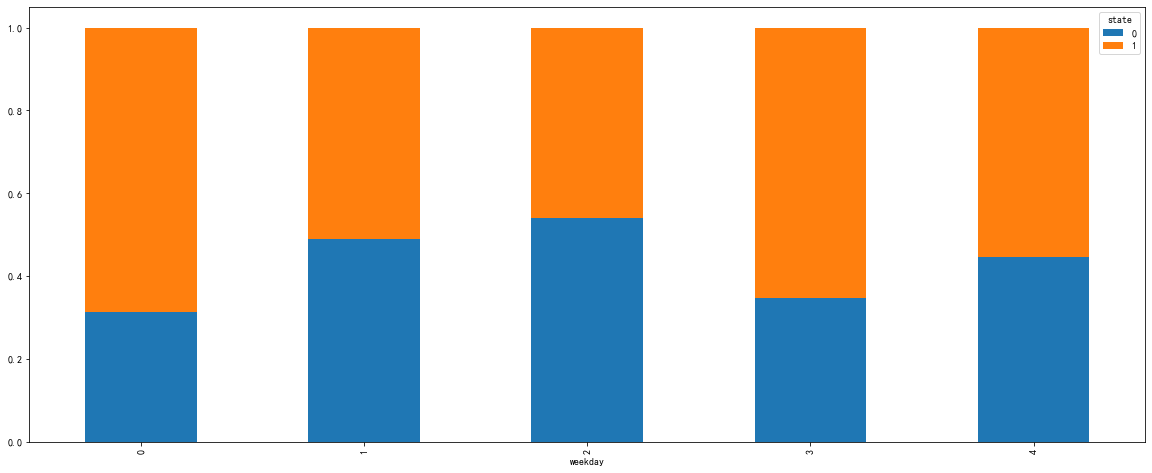

In [5]:
# 需求：判断股票的涨跌是否与星期几有关系

# 将股票数据导入
data = pd.read_excel("./茅台.xlsx").drop(labels="Unnamed: 0",axis=1).set_index("date")
# 将行索引取出，且将数据转换为日期格式，之后再将该日期与星期几对应
data["weekday"] = pd.to_datetime(data.index).weekday
# 将每一天股票的涨跌情况存入data中
data["state"] = np.where((data["close"]-data["open"])>0,1,0)    # np.where(condition,x,y)：condition为真，返回x，否则返回y
relationship = pd.crosstab(data["weekday"],data["state"])
sum = relationship.sum(axis=1)
pert = relationship.div(sum,axis=0)
pert.plot(kind="bar",figsize=(20,8),stacked=True)
plt.show()

In [342]:
# 对上述data直接计算出百分比
d = data.pivot_table(values=["state"],index="weekday")
d
# 解析：算出weekday=x时，求state的总值（即将state的值求和）。因为pivot_table()默认执行np.mean()，所以(state=1相加总数)/(state的总值),得到结果

,state
weekday,
0,0.687500
1,0.510204
2,0.460000
3,0.653061
4,0.553191


### Series与DataFrame画图
- df.plot(kind)
    - 参数kind："line"折线图，"bar"条形图，"barh"横着的条形图，"hist"直方图，"pie"扇形图，"scatter"散点图
- s.plot()
- 其中的参数解释可以查看百度

<AxesSubplot:xlabel='date'>

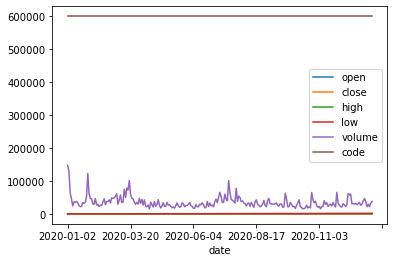

In [178]:
data.plot()

### 数据的离散化
- 为什么要数据离散化？
    - 连续属性离散化的目的是为了简化数据结构，数据离散化技术可以用来减少给定连续属性值的个数。
- 什么是数据的离散化？
    - 连续属性的离散化就是在连续属性的值域上,将值域划分为若干个离散的区间,最后用不同的符号或整数值代表落在每个子区间中的属性值。
- pd.qcut(data,q)
    - 将data分为q组
    - 一般会使用value_counts()：查看每组数据的个数
- pd.cut(data,bins)
    - 参数bins：自定义分组区间
- pd.get_dummies(data,prefix)
    - one-hot编码
    - 参数data：分完组之后的数据。如：使用pd.qcut(data,q)后的数据
    - 参数prefix：在列表名前加上这个参数值

In [6]:
# 引入数据
data = pd.read_excel("./茅台.xlsx")
data = data.drop(labels="Unnamed: 0",axis=1).set_index("date")    # 删除列并且将“date”列作为行索引
openData = data["open"]

- pd.qcut(data,q)

In [7]:
# 自动分成差不多区间
groupData = pd.qcut(openData,10)
groupData.value_counts()

(1770.462, 1941.0]      25
(1378.776, 1603.09]     25
(984.999, 1081.2]       25
(1730.82, 1770.462]     24
(1699.798, 1730.82]     24
(1662.672, 1699.798]    24
(1603.09, 1662.672]     24
(1237.208, 1378.776]    24
(1114.6, 1237.208]      24
(1081.2, 1114.6]        24
Name: open, dtype: int64

In [11]:
# 指定分成什么大小的区间
bins = [900,1300,1600,2000]
groupData = pd.cut(openData,bins)
groupData.value_counts()

(1600, 2000]    122
(900, 1300]      81
(1300, 1600]     40
Name: open, dtype: int64

- one-hot编码：pd.get_dummies(data,prefix)

In [9]:
# 将数据进行分组
bins = [900,1100,1300,1600,2000]
groupData = pd.cut(data["open"],bins)
# 将groupData进行one-hot编码
one_hot_data = pd.get_dummies(groupData,prefix="开盘数据")
one_hot_data

,"开盘数据_(900, 1100]","开盘数据_(1100, 1300]","开盘数据_(1300, 1600]","开盘数据_(1600, 2000]"
date,,,,
2020-01-02,0,1,0,0
2020-01-03,0,1,0,0
2020-01-06,1,0,0,0
2020-01-07,1,0,0,0
2020-01-08,1,0,0,0
...,...,...,...,...
2020-12-25,0,0,0,1
2020-12-28,0,0,0,1
2020-12-29,0,0,0,1
